# Markov Chain simulation on a sample student state space

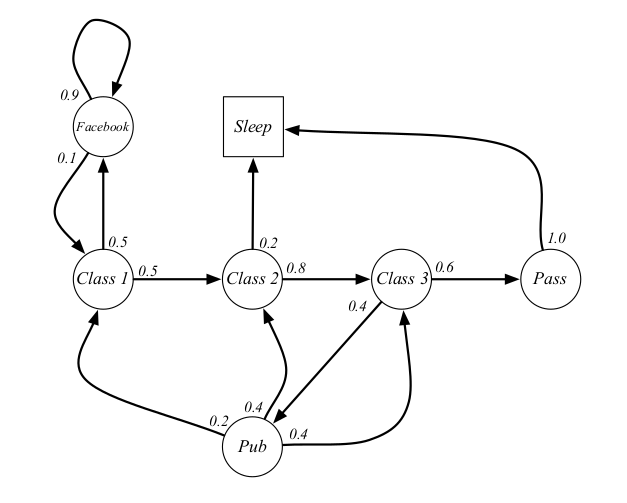

In [ ]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
from statistics import mean 

class MarkovChain:
    def __init__(self):
        self.states=["c1","c2","c3","pass","pub","fb","sleep"]
        self.start=["c1"]
        self.terminal=["sleep"]
        self.current=random.choice(self.start)
        
        self.P=pd.DataFrame(
            np.array([[0,0.5,0,0,0,0.5,0],
                [0,0,0.8,0,0,0,0.2],
                [0,0,0,0.6,0.4,0,0],
                [0,0,0,0,0,0,1.0],
                [0.2,0.4,0.4,0,0,0,0],
                [0.1,0,0,0,0,0.9,0],
                [0,0,0,0,0,0,1.0]]),
            index=self.states, columns=self.states)
        
    def transition(self):              
        cdf = self.P.loc[self.current].cumsum()
        state = (cdf>=random.random()).idxmax()
        self.current=state       

    def reset(self):
        self.current=random.choice(self.start)  
        

## Sample Episodes for Student Markov Chain

In [ ]:
print("Welcome To Student Markov Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))
    
studmp = MarkovChain()

for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmp.reset()
    while(studmp.current not in studmp.terminal):
        chainwalk=chainwalk+"->"+studmp.current
        studmp.transition()
    chainwalk=chainwalk+"->"+studmp.current
    print(chainwalk)

# Markov Reward Process simulation on a sample student state space

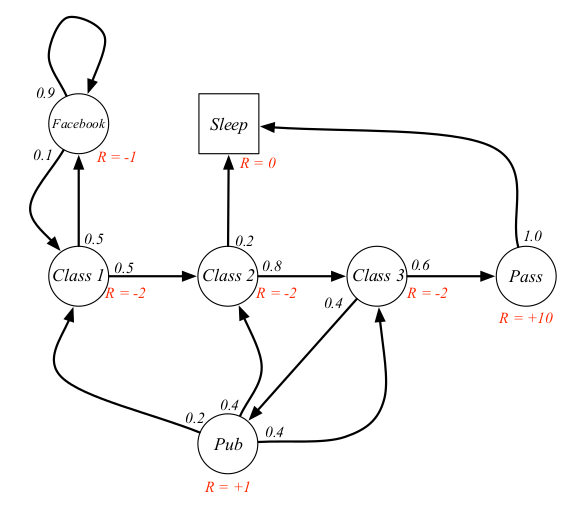

In [ ]:
class MRP:
    def __init__(self,gamma=1):
        self.states=["c1","c2","c3","pass","pub","fb","sleep"]
        self.start=["c1"]
        self.terminal=["sleep"]
        self.current=random.choice(self.start)
        
        self.R=pd.Series(np.array([-2,-2,-2,10,1,-1,0]), index=self.states)
        self.V=pd.Series(np.array([0,0,0,0,0,0,0]), index=self.states)
        self.gamma=gamma
        self.G=0
        self.t=1
        
        self.P=pd.DataFrame(np.array([[0,0.5,0,0,0,0.5,0],
                [0,0,0.8,0,0,0,0.2],
                [0,0,0,0.6,0.4,0,0],
                [0,0,0,0,0,0,1.0],
                [0.2,0.4,0.4,0,0,0,0],
                [0.1,0,0,0,0,0.9,0],
                [0,0,0,0,0,0,1.0]]),
                index=self.states, columns=self.states)            
        
    def transition(self):       
        cdf = self.P.loc[self.current].cumsum()        
        state = (cdf>=random.random()).idxmax()                     #While exiting from current state        
        self.t=self.t+1                                              #Increase the step count
        self.G=self.G+pow(self.gamma,self.t-2)*self.R[self.current]  #Calculate total reward
        print("{:5} | {:6} | {:8}".format(self.current, self.R[self.current], pow(self.gamma,self.t-2)))    
        self.current=state          
        
    def total_reward(self):
        return self.G
    
    def calc_state_value(self, itr=10, inv=False):        
        if inv:
            invmat =  np.linalg.inv(np.identity(self.V.shape[-1])-self.gamma*self.P)
            self.V = np.matmul(invmat,self.R)
        else:        
            for i in range(itr):
                self.V = self.R + self.gamma*np.matmul(self.P,self.V)        

    def reset(self):
        self.current=random.choice(self.start)
        self.G=0
        self.t=1

## Sample Episodes for Student Markov Reward Process

In [ ]:
print("Welcome To Student Markov Reward Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))
    
studmrp = MRP(0.5)

for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmrp.reset()
    print("State | Reward | Discount")
    while(studmrp.current not in studmrp.terminal):
        chainwalk=chainwalk+"->"+studmrp.current
        studmrp.transition()
    chainwalk=chainwalk+"->"+studmrp.current
    trew=studmrp.total_reward()
    print(chainwalk)
    print("You earned: {} points!".format(trew))
    print(" ")

## Computing State Value Function V(s)

In [ ]:
gamma=0
studmrp = MRP(gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

In [ ]:
gamma=0.9
studmrp = MRP(gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

In [ ]:
gamma=0.9
studmrp = MRP(gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

In [ ]:
gamma=1
studmrp = MRP(gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

In [ ]:
gamma=1
studmrp = MRP(gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

In [ ]:
gamma=0.3
studmrp = MRP(gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

# Markov Decision Process simulation on a sample student state space

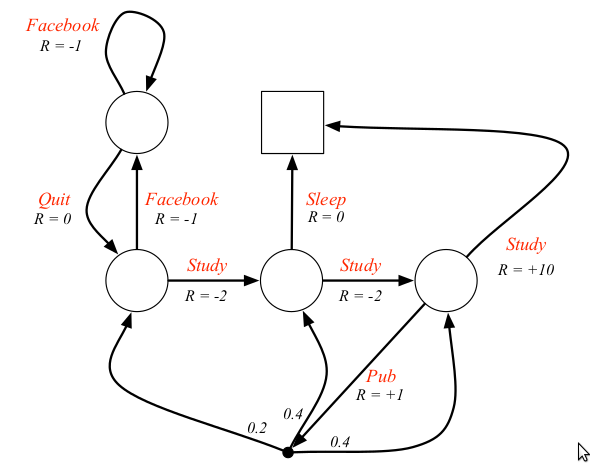

In [1]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
from statistics import mean 

class MDP:
    def __init__(self,gamma=1):
        self.states = ["c1","c2","c3","fb","sleep"]
        self.actions = ["study", "fb", "quit", "pub", "sleep"]
        self.start = ["c1"]
        self.terminal = ["sleep"]
        self.current = np.random.choice(self.start)      
        
        self.R = []
        self.A2R = pd.DataFrame(np.array([[-2,-2,10,0,0],
                  [-1,0,0,-1,0],
                  [0,0,0,0,0],
                  [0,0,1,0,0],
                  [0,0,0,0,0]]),
                  index = self.actions, columns = self.states)
        
        self.V=pd.Series(np.array([0,0,0,0,0]), index = self.states)
        self.gamma=gamma
        self.G=0
        self.t=1
        
        self.P=[]        
        self.S2A=pd.DataFrame(np.array([[0.5,0.5,0,0,0],
                  [0.5,0,0,0,0.5],
                  [0.5,0,0,0.5,0],
                  [0,0.5,0.5,0,0],
                  [0,0,0,0,1]]),
                  index = self.states, columns = self.actions)
        #self.A2S= pd.Panel(
        self.A2S=np.array([
                  [[0,1,0,0,0],
                  [0,0,0,1,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                  [[0,0,1,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,1]],
                  [[0,0,0,0,1],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0.2,0.4,0.4,0,0],
                  [0,0,0,0,0]],
                  [[0,0,0,0,0],
                  [0,0,0,1,0],
                  [1,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                  [[0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                 ]) 
            #), items = self.states, major_axis = self.actions, minor_axis = self.states)
        
        
        self.calc_Rpi()
        self.calc_Ppi()
        
    def calc_Rpi(self, f=1):
        rpi = np.matmul(self.S2A, self.A2R)
        #here diagonal of the matrix represents Rpi equation 
        self.R = pd.Series(np.diag(rpi), index = self.states)
        if(f):
            print("Reward Function for the given policy i.e. Rpi: ")
            print(self.R)
        
    def calc_Ppi(self, f=1):
        ppi = []
        for i in range(len(self.states)):
            pa2s = np.matmul(self.S2A, self.A2S[i])
            #here ith row of the matrix represents Ppi equation 
            pa2s = pa2s.loc[self.states[i]]
            if np.size(ppi)==0:
                ppi = np.append(ppi,pa2s)
            else:
                ppi = np.vstack((ppi,pa2s))
            
        self.P = pd.DataFrame(ppi, index = self.states, columns = self.states)
        if(f):
            print("Transition Probability for the given policy i.e. Ppi: ")
            print(self.P)
        
        
    def transition(self):       
        cdf = self.P.loc[self.current].cumsum()        
        state = (cdf>=random.random()).idxmax()                     #While exiting from current state        
        self.t=self.t+1                                              #Increase the step count
        self.G=self.G+pow(self.gamma,self.t-2)*self.R[self.current]  #Calculate total reward
        print("{:5} | {:6} | {:8}".format(self.current, self.R[self.current], pow(self.gamma,self.t-2)))    
        self.current=state          
        
    def total_reward(self):
        return self.G
    
    def calc_state_value(self, itr=10, inv=False):        
        if inv:
            invmat =  np.linalg.inv(np.identity(self.V.shape[-1])-self.gamma*self.P)
            self.V = np.matmul(invmat,self.R)
        else:        
            for i in range(itr):
                self.V = self.R + self.gamma*np.matmul(self.P,self.V)
    
    def policy_eval(self):
        self.calc_Rpi(0)
        self.calc_Ppi(0)
        self.calc_state_value(itr=100)
        
    def update_policy(self):
        self.S2A[:] = 0        
        for i in range(len(self.states)):
            qa = np.matmul(self.A2S[i], self.V)
            qpi = self.A2R[self.states[i]] + self.gamma*qa
            self.S2A[qpi.idxmax()] = 1        
                
    def policy_iter(self, itr=100, eps = 1e-10):
        i=0
        while True:
            i = i + 1
            Vprev = self.V[:]
            self.update_policy()
            self.policy_eval()
            if (np.sum((np.fabs(Vprev - self.V))) <= eps):
                #convergence
                print("Achieved V* after {}th iteration!".format(i))
                break

    def reset(self):
        self.current=random.choice(self.start)
        self.G=0
        self.t=1

In [2]:
gamma=1
studmdp = MDP(gamma)

Reward Function for the given policy i.e. Rpi: 
c1      -1.5
c2      -1.0
c3       5.5
fb      -0.5
sleep    0.0
dtype: float64
Transition Probability for the given policy i.e. Ppi: 
        c1   c2   c3   fb  sleep
c1     0.0  0.5  0.0  0.5    0.0
c2     0.0  0.0  0.5  0.0    0.5
c3     0.1  0.2  0.2  0.0    0.5
fb     0.5  0.0  0.0  0.5    0.0
sleep  0.0  0.0  0.0  0.0    0.0


In [3]:
studmdp.S2A

,study,fb,quit,pub,sleep
c1,0.5,0.5,0.0,0.0,0.0
c2,0.5,0.0,0.0,0.0,0.5
c3,0.5,0.0,0.0,0.5,0.0
fb,0.0,0.5,0.5,0.0,0.0
sleep,0.0,0.0,0.0,0.0,1.0


In [4]:
studmdp.A2R

,c1,c2,c3,fb,sleep
study,-2,-2,10,0,0
fb,-1,0,0,-1,0
quit,0,0,0,0,0
pub,0,0,1,0,0
sleep,0,0,0,0,0


In [5]:
print("Optimal Value for given policy (Vpi): ")
studmdp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmdp.V)):
    print("{:5} | {:5}".format(studmdp.states[i], studmdp.V[i]))

Optimal Value for given policy (Vpi): 
State | Value | Gamma = 1
-------------
c1    | -1.3076923099959046
c2    | 2.6923076920317515
c3    | 7.384615384159404
fb    | -2.3076923112229597
sleep |   0.0


In [7]:
print("Welcome To Student Markov Decision Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))
for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmdp.reset()
    print("State | Reward | Discount")
    while(studmdp.current not in studmdp.terminal):
        chainwalk=chainwalk+"->"+studmdp.current
        studmdp.transition()
    chainwalk=chainwalk+"->"+studmdp.current
    trew=studmdp.total_reward()
    print(chainwalk)
    print("You earned: {} points!".format(trew))
    print(" ")

Welcome To Student Markov Decision Process Simulator!

Enter no. of random walks: 5
RW 1:
State | Reward | Discount
c1    |   -1.5 |        1
c2    |   -1.0 |        1
->c1->c2->sleep
You earned: -2.5 points!
 
RW 2:
State | Reward | Discount
c1    |   -1.5 |        1
fb    |   -0.5 |        1
c1    |   -1.5 |        1
c2    |   -1.0 |        1
c3    |    5.5 |        1
->c1->fb->c1->c2->c3->sleep
You earned: 1.0 points!
 
RW 3:
State | Reward | Discount
c1    |   -1.5 |        1
c2    |   -1.0 |        1
->c1->c2->sleep
You earned: -2.5 points!
 
RW 4:
State | Reward | Discount
c1    |   -1.5 |        1
c2    |   -1.0 |        1
->c1->c2->sleep
You earned: -2.5 points!
 
RW 5:
State | Reward | Discount
c1    |   -1.5 |        1
fb    |   -0.5 |        1
fb    |   -0.5 |        1
c1    |   -1.5 |        1
fb    |   -0.5 |        1
c1    |   -1.5 |        1
fb    |   -0.5 |        1
fb    |   -0.5 |        1
c1    |   -1.5 |        1
fb    |   -0.5 |        1
fb    |   -0.5 |        1
f

## Calculate Optimal Policy and V*
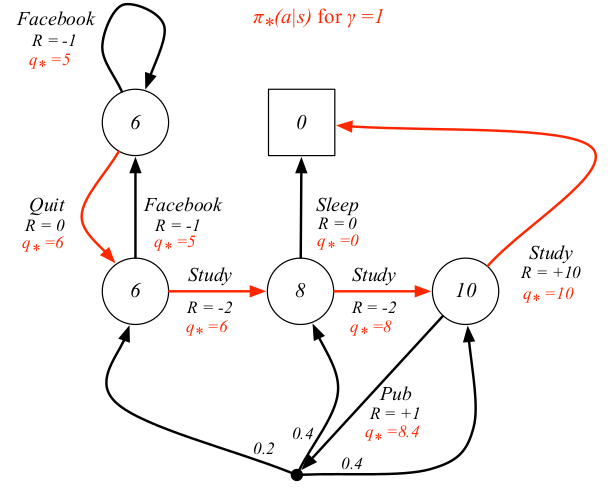

In [8]:
print("Optimal Policy Values (V*):")
studmdp.policy_iter(itr=100)

print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmdp.V)):
    print("{:5} | {:5}".format(studmdp.states[i], studmdp.V[i]))

Optimal Policy Values (V*):
Achieved V* after 3th iteration!
State | Value | Gamma = 1
-------------
c1    |   6.0
c2    |   8.0
c3    |  10.0
fb    |   6.0
sleep |   0.0


In [12]:
studmdp.P

,c1,c2,c3,fb,sleep
c1,0.0,1.0,0.0,0.0,0.0
c2,0.0,0.0,1.0,0.0,0.0
c3,0.0,0.0,0.0,0.0,1.0
fb,1.0,0.0,0.0,0.0,0.0
sleep,0.0,0.0,0.0,0.0,0.0


In [10]:
print("Welcome To Student Markov Decision Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))
for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmdp.reset()
    print("State | Reward | Discount")
    while(studmdp.current not in studmdp.terminal):
        chainwalk=chainwalk+"->"+studmdp.current
        studmdp.transition()
    chainwalk=chainwalk+"->"+studmdp.current
    trew=studmdp.total_reward()
    print(chainwalk)
    print("You earned: {} points!".format(trew))
    print(" ")

Welcome To Student Markov Decision Process Simulator!

Enter no. of random walks: 5
RW 1:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
RW 2:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
RW 3:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
RW 4:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
RW 5:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
